# Example 1
This notebook, associated to the configuration file *config_Example1.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [ ]:
path_config = 'config_Example1.py'

In [ ]:
import sys
sys.path.append('..')

In [3]:
from src import exp
config = exp.exp(path_config)

## State

In [4]:
from src import state as state
State = state.State(config)

## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

Model: QG1L


## Observations

In [6]:
from src import obs as obs
dict_obs = obs.obs(config,State)

* for sat swot :
 satellite : swot 
 kind : swot_simulator 
 path : ../../data_Example1/dc_obs/ 
 name : 2020a_SSH_mapping_NATL60_karin_swot.nc
2012-11-03 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121103_18h00.nc
2012-11-04 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121104_06h00.nc
2012-11-04 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121104_18h00.nc
2012-11-05 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121105_06h00.nc
2012-11-05 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121105_18h00.nc
2012-11-06 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121106_06h00.nc
2012-11-06 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121106_18h00.nc
2012-11-07 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121107_06h00.nc
2012-11-07 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121107_18h00.nc
2012-11-08 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121108_06h00.nc
2012-11-08 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121

## Assimilation

In [7]:
from src import ana as ana
ana.ana(config,State,Model,dict_obs=dict_obs)

Loop from 2012-11-01 to 2012-11-08 : 2 iterations in 0:00:32.570682 seconds
Loop from 2012-11-02 to 2012-11-09 : 2 iterations in 0:00:27.988186 seconds
Loop from 2012-11-04 to 2012-11-10 : 2 iterations in 0:00:23.544693 seconds



## Visualize outputs

In [8]:
import matplotlib.pylab as plt

In [9]:
ds0 = State.load_output(config.init_date)
ds1 = State.load_output(config.final_date)

Text(0.5, 1.0, '$SSH(t_1)-SSH(t_0)$')

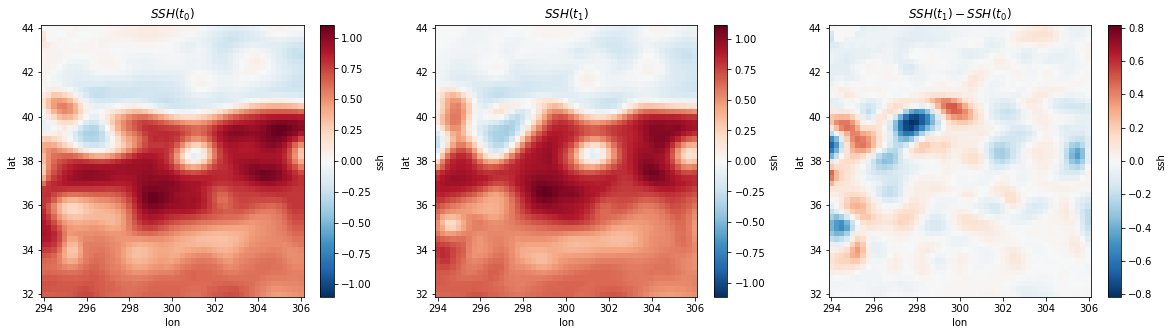

In [10]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
ds0.ssh.plot(ax=ax)
ax.set_title('$SSH(t_0)$')

ax = fig.add_subplot(132)
ds1.ssh.plot(ax=ax)
ax.set_title('$SSH(t_1)$')

ax = fig.add_subplot(133)
(ds1.ssh-ds0.ssh).plot(ax=ax)
ax.set_title('$SSH(t_1)-SSH(t_0)$')